In [17]:
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Set your dataset path
dataset_path = r"C:\Users\16172\Desktop\OCT2017"

# Paths to training and testing directories
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

# Function to count number of files (images) in each class folder
def count_images_by_class(path):
    counts = {}
    for class_name in os.listdir(path):
        class_dir = os.path.join(path, class_name)
        if os.path.isdir(class_dir):
            counts[class_name] = len(os.listdir(class_dir))
    return counts

# Get counts
train_counts = count_images_by_class(train_path)
test_counts = count_images_by_class(test_path)

# Create dataframes
train_df = pd.DataFrame(list(train_counts.items()), columns=['Class', 'Train Count'])
test_df = pd.DataFrame(list(test_counts.items()), columns=['Class', 'Test Count'])

# Merge the dataframes on 'Class'
summary_df = pd.merge(train_df, test_df, on='Class')

# Display the summary
print(summary_df)


    Class  Train Count  Test Count
0     CNV        37205         250
1     DME        11348         250
2  DRUSEN         8616         250
3  NORMAL        26315         250


In [8]:
print("Train Set Summary Statistics:")
print(train_df.describe())

print("Test Set Summary Statistics:")
print(test_df.describe())

Train Set Summary Statistics:
        Train Count
count      4.000000
mean   20871.000000
std    13382.939961
min     8616.000000
25%    10665.000000
50%    18831.500000
75%    29037.500000
max    37205.000000
Test Set Summary Statistics:
       Test Count
count         4.0
mean        250.0
std           0.0
min         250.0
25%         250.0
50%         250.0
75%         250.0
max         250.0


### Summary Statistics Interpretation ^

#### Train Set:
- The training set contains 4 classes: CNV, DME, DRUSEN, and NORMAL.
- The `mean` number of samples per class is approximately **20,871**, but the `std` (standard deviation) is quite high at **13,382**, telling us theres a significant **class imbalance**.
- The **smallest class**, DRUSEN, has **8,616** images, while the **largest class**, CNV, has **37,205**.
- This imbalance could negatively affect model performance, especially for underrepresented classes.

#### Test Set:
- The test set is **perfectly balanced**, with each class containing exactly **250 samples**.
- `std = 0` confirms there is **no variation** in sample counts across classes.
- A balanced test set is good for evaluating model performance fairly across all classes.

#### Conclusion:
- Special care should be taken during training to handle the imbalance in the training set, possibly through **data augmentation**, **class weighting**, or **resampling techniques**.


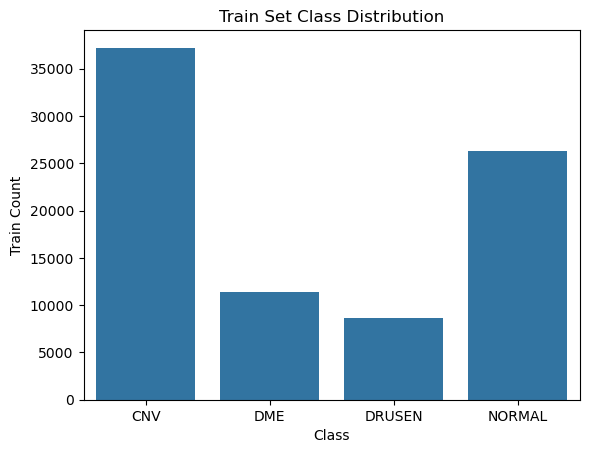

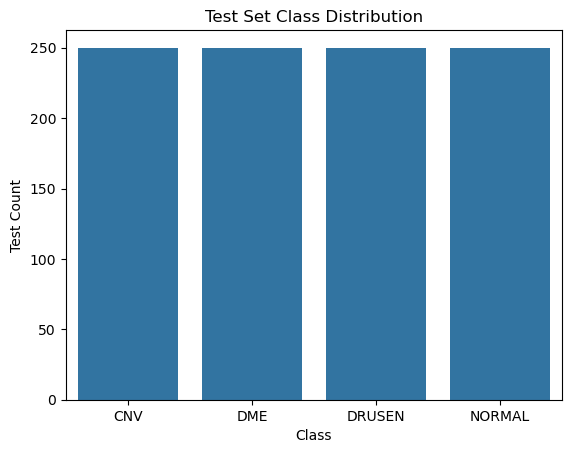

Processing NORMAL: 100%|██████████| 26315/26315 [02:33<00:00, 171.07it/s]


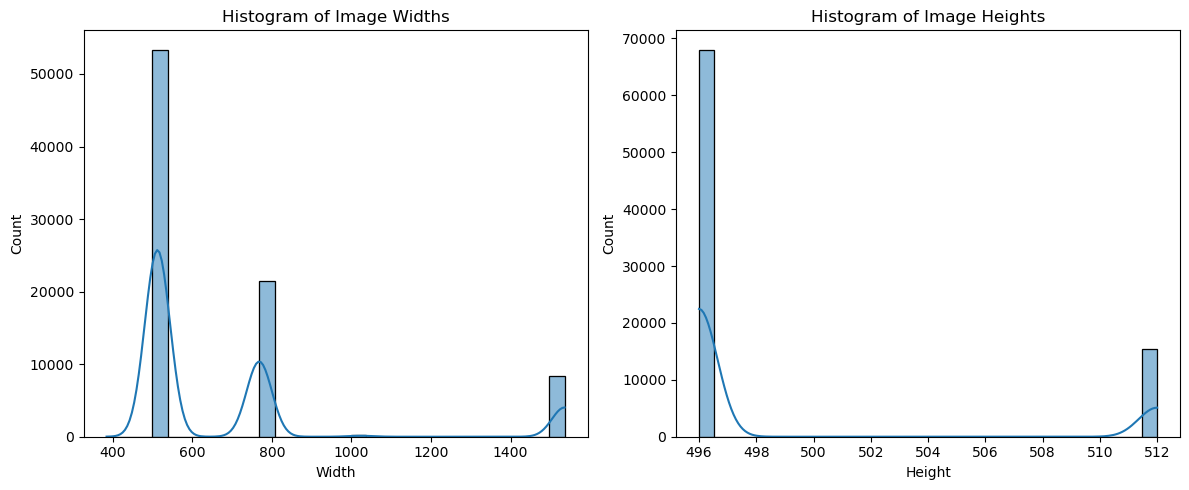

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=train_df, x='Class', y='Train Count')
plt.title('Train Set Class Distribution')
plt.show()

sns.barplot(data=test_df, x='Class', y='Test Count')
plt.title('Test Set Class Distribution')
plt.show()

# Collect image dimensions (width, height)
image_shapes = []

# Histogram
for class_name in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_name)
    if os.path.isdir(class_dir):
        for filename in tqdm(os.listdir(class_dir), desc=f"Processing {class_name}"):
            img_path = os.path.join(class_dir, filename)
            try:
                with Image.open(img_path) as img:
                    w, h = img.size
                    image_shapes.append((w, h))
            except Exception as e:
                print(f"Error reading {img_path}: {e}")

# Create DataFrame for plotting
dim_df = pd.DataFrame(image_shapes, columns=['Width', 'Height'])

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(dim_df['Width'], kde=True, bins=30)
plt.title("Histogram of Image Widths")

plt.subplot(1, 2, 2)
sns.histplot(dim_df['Height'], kde=True, bins=30)
plt.title("Histogram of Image Heights")

plt.tight_layout()
plt.show()


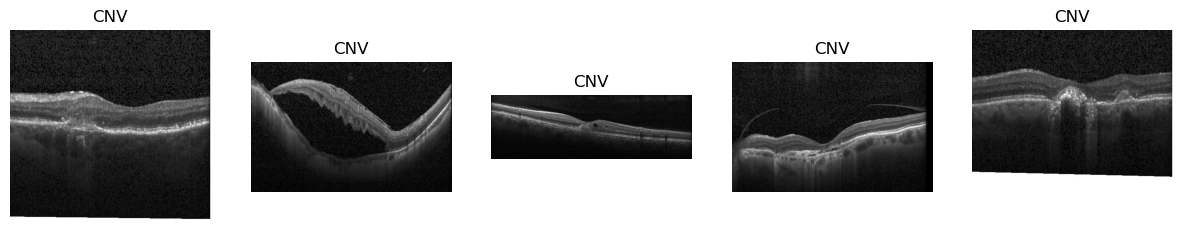

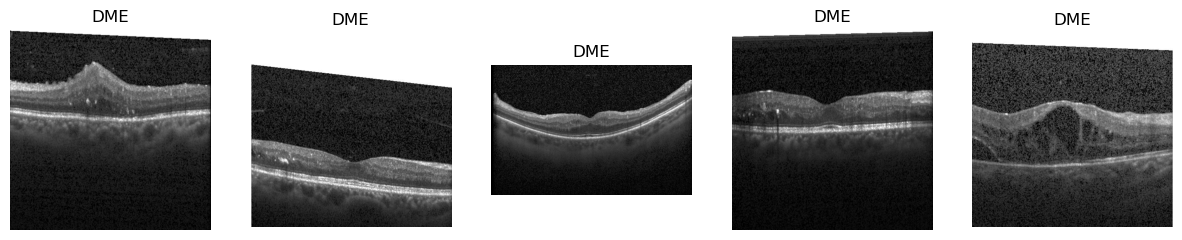

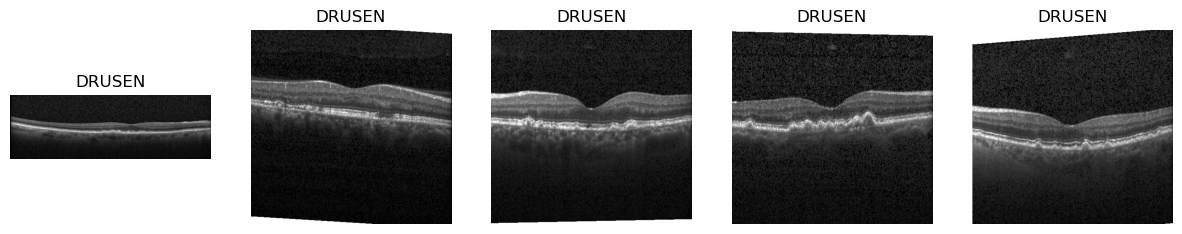

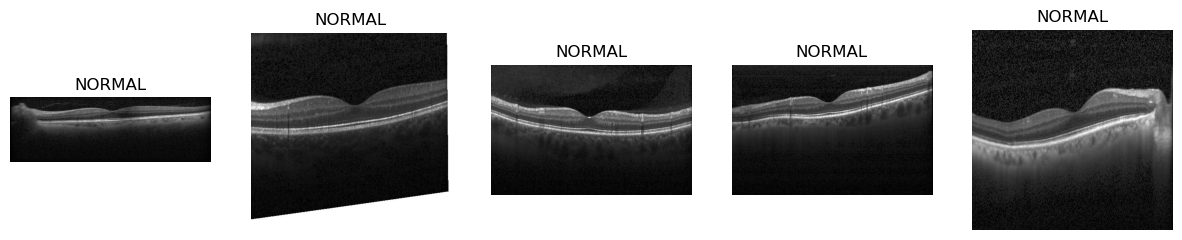

In [14]:
# Show 5 random images per class
import random
from PIL import Image

def show_samples(path, label, n=5):
    files = os.listdir(os.path.join(path, label))
    samples = random.sample(files, n)
    fig, axs = plt.subplots(1, n, figsize=(15, 4))
    for i, file in enumerate(samples):
        img = Image.open(os.path.join(path, label, file))
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(label)
    plt.show()

for label in os.listdir(os.path.join(dataset_path, 'train')):
    show_samples(os.path.join(dataset_path, 'train'), label)